# CNN Model for X-Ray Classification

## Deep Learning
### Spring Semester 2021/2022

- Ana Luís, 20210671
- Carolina Machado, 20210676
- Francisco Calha, 20210673
- Luís Santos, 20210694
- Sara Arana, 20210672

# 1. Imports and dataset

In [1]:
# !pip install focal-loss

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from focal_loss import SparseCategoricalFocalLoss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
import seaborn as sn
import cv2


import tensorflow as tf 
from tensorflow.keras.preprocessing import image

import os
for dirname, _, filenames in os.walk('/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cnn_covid_x-ray_v1.h5
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\Model Images and Outputs.docx
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\Report.docx
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\Untitled.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\XRAY_train_val.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\XRAY_train_val_test.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\X_RAY_NEW.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\.ipynb_checkpoints\Untitled-checkpoint.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\.ipynb_checkpoints\XRAY_train_val-checkpoint.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\.ipynb_checkpoints\XRAY_train_val_test-checkpoint.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\.ipynb_checkpoints\X_RAY_NEW-checkpoint.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Outp

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-945.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-947.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-95.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-950.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-951.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-952.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-953.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-954.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-955.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Covid\COVID-956.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_N

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-609.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-61.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-612.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-613.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-614.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-615.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-618.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-619.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Lung Opacity\Lung_Opacity-62.png
/Users/Carolina Magee

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-1001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-1002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-1005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-1007.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-1009.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-101.png
/Users/Carolina Magee/De

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-285.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2850.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2851.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2852.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2853.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2854.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2855.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2856.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2857.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Normal\Normal-2859.png
/Users/Carolina Magee

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-1.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-1002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-1003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Viral Pneumonia\Viral Pneumonia-1005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\train\Vir

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-251.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-255.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-270.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-276.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-280.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-288.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-289.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-296.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-299.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Covid\COVID-302.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\v

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Untitled.ipynb
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneumonia-1001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneumonia-101.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneumonia-1019.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneumonia-102.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneumonia-1020.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneumonia-1025.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneumonia-1026.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\cortado\Output\val\Viral Pneumonia\Viral Pneum

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1006.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1007.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-1008.png
/Users/Car

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2477.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2478.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2479.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-248.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2480.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2481.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2482.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2483.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2484.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2485.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2486.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-2487.png
/User

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-503.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-504.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-505.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-506.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-507.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-508.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-509.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-51.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-510.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-511.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-512.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\covid\COVID-513.png
/Users/Carolina M

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-1006.png
/Users/Carolina Magee/Desktop/Deep L

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2042.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2043.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2044.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2045.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2046.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2047.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2048.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2049.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-205.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-2050.png
/Users/Carolina Magee/Desktop/D

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3223.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3224.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3225.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3226.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3227.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3228.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3229.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-323.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3230.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-3231.png
/Users/Carolina Magee/Desktop/D

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-437.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4370.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4371.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4372.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4373.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4374.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4375.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4376.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4377.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-4378.png
/Users/Carolina Magee/Desktop/D

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-552.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5520.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5521.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5522.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5523.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5524.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5525.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5526.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5527.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\lung_opacity\Lung_Opacity-5528.png
/Users/Carolina Magee/Desktop/D

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-10006.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\no

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1734.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1735.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1736.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1737.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1738.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1739.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-174.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1740.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1741.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1742.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-1743.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2905.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2906.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2907.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2908.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2909.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-291.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2910.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2911.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2912.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2913.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-2914.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4113.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4114.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4115.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4116.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4117.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4118.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4119.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-412.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4120.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4121.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-4122.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5238.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5239.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-524.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5240.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5241.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5242.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5243.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5244.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5245.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5246.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-5247.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6204.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6205.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6206.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6207.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6208.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6209.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-621.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6210.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6211.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6212.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-6213.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7131.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7132.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7133.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7134.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7135.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7136.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7137.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7138.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7139.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-714.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-7140.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8314.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8315.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8316.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8317.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8318.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8319.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-832.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8320.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8321.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8322.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-8323.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9424.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9425.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9426.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9427.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9428.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9429.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-943.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9430.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9431.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9432.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\normal\Normal-9433.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\norm

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-1.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-1001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-1002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-1003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\Viral Pneumonia-1005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\dataset\viral_pneumonia\V

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1007.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1009.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-101.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-1010.png
/Users/Carolina Magee/Desktop/Deep L

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2273.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2274.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2275.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2276.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2277.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-228.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2280.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2282.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2283.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2284.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-2285.png
/Users/Carolina Magee/Desktop/Dee

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-523.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-524.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-525.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-526.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-527.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-528.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-529.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-53.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-531.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-533.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\covid\COVID-534.png
/Users/Carolina Magee/Desktop/Deep Learning/

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1006.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-1007.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lun

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-2791.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-2792.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-2793.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-2795.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-2796.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-2798.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-2799.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-28.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-280.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5007.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5008.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5009.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-501.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5010.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5011.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5013.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5014.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lung_Opacity-5015.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\lung_opacity\Lun

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-1.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10001.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10002.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10005.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10006.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10007.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10008.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-10009.png
/Us

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2250.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2252.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2253.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2254.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2256.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2257.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2259.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2260.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2261.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2262.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-2263.png
/Users/Car

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3779.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-378.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3780.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3781.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3782.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3783.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3784.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3785.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3786.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3787.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-3788.png
/Users/Caro

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4963.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4965.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4966.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4967.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4968.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4970.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4972.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4973.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4974.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4975.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-4976.png
/Users/Car

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6143.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6144.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6146.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6148.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6149.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-615.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6151.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6152.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6153.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6154.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-6155.png
/Users/Caro

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7336.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7337.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7338.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7339.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-734.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7341.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7342.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7343.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7345.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7346.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-7347.png
/Users/Caro

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8696.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8697.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8698.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8699.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-87.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-870.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8702.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8703.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8704.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8705.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-8706.png
/Users/Caroli

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-997.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9970.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9971.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9972.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9974.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9975.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9976.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9977.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9978.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-9979.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\normal\Normal-998.png
/Users/Carol

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-195.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-197.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-198.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-2.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-20.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-200.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-202.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-203.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\train\viral_pneumonia\Viral Pneumonia-204.png
/Users/Carolina Magee/Desktop/Deep Learn

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1003.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1006.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1008.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1013.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1023.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1042.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1044.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1045.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1054.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\covid\COVID-1056.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\out

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-108.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1087.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1090.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1093.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1094.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1097.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1109.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1110.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1111.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\lung_opacity\Lung_Opacity-1114.png
/

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-100.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-1000.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10018.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10019.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10020.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10028.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10030.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-1004.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10041.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-10042.png
/Users/Carolina Magee/Deskto

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5710.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5716.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5722.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5723.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5729.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-573.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5732.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5738.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5739.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5743.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\normal\Normal-5744.png
/Users/Carolina Magee/Desktop/Dee

/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1275.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-128.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1285.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1286.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1288.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1291.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1292.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1293.png
/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW\output\val\viral_pneumonia\Viral Pneumonia-1298.png
/Users/Carolina Magee/Desktop/Deep Learning/X_R

# 2. Data Pre-Processing

In [3]:
path = "/Users/Carolina Magee/Desktop/Deep Learning/X_RAY_NEW/dataset"

os.listdir(path)

['covid',
 'COVID_heatmap.png',
 'dataset.zip',
 'lung_opacity',
 'LUNG_OPACITY_heatmap.png',
 'normal',
 'NORMAL_heatmap.png',
 'viral_pneumonia',
 'VIRAL_PNEUMONIA_heatmap.png']

#### Loading The Dataset

In [4]:
normal_xray = []
count = 0

for img_path in glob.glob(path + "/normal/*"):
    count += 1
    normal_xray.append(image.load_img(str(img_path), target_size=(150,150,3)))
    if count > 6000:
        break

covid_xray = []
for img_path in glob.glob(path + "/covid/*"): 
    covid_xray.append(image.load_img(str(img_path), target_size=(150,150,3)))
    
lung_opacity_xray = []
for img_path in glob.glob(path + "/lung_opacity/*"): 
    lung_opacity_xray.append(image.load_img(str(img_path), target_size=(150,150,3)))
    
viral_pneumonia_xray = []
for img_path in glob.glob(path + "/viral_pneumonia/*"): 
    viral_pneumonia_xray.append(image.load_img(str(img_path), target_size=(150,150,3)))

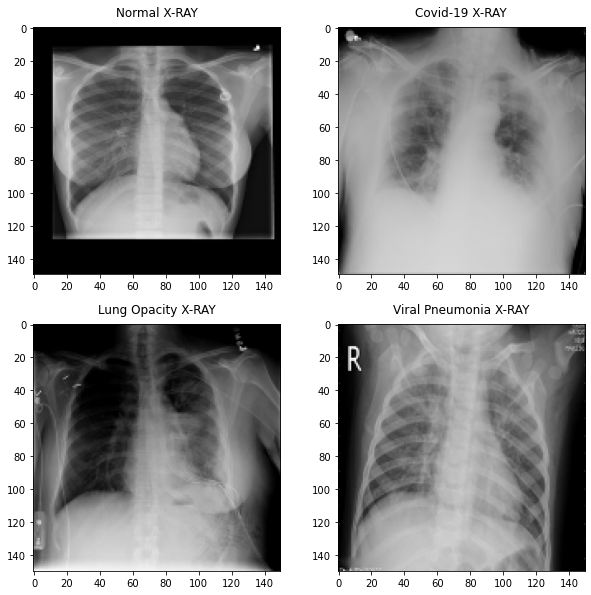

In [5]:
fig, axes = plt.subplots(2,2,figsize=(10, 10))
axes[0,0].imshow(normal_xray[0], cmap="gray")
axes[0,0].set_title('Normal X-RAY', y=1.02)
axes[0,1].imshow(covid_xray[0], cmap = "gray")
axes[0,1].set_title('Covid-19 X-RAY', y=1.02)
axes[1,0].imshow(lung_opacity_xray[0], cmap = "gray")
axes[1,0].set_title('Lung Opacity X-RAY', y=1.02)
axes[1,1].imshow(viral_pneumonia_xray[0], cmap = "gray")
axes[1,1].set_title('Viral Pneumonia X-RAY', y=1.02)

plt.show()

In [6]:
print('Our dataset has %s normal x-rays, %s covid x-rays, %s lung opacity x-rays, and %s viral pneumonia x-rays.'%(str(len(normal_xray)),str(len(covid_xray)),str(len(lung_opacity_xray)),str(len(viral_pneumonia_xray))))

Our dataset has 6001 normal x-rays, 3616 covid x-rays, 6012 lung opacity x-rays, and 1345 viral pneumonia x-rays.


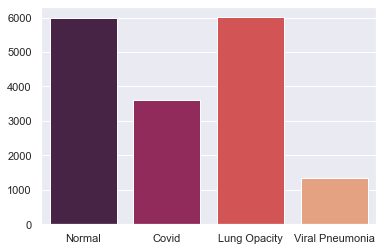

In [73]:
dict_v = {'Normal':float(len(normal_xray)),'Covid':float(len(covid_xray)),'Lung Opacity': float(len(lung_opacity_xray)),'Viral Pneumonia':float(len(viral_pneumonia_xray))}
sns.barplot(y =list(dict_v.values()),x = list(dict_v.keys()), orient = 'v',palette = 'rocket' );

In [7]:
all_xrays = []

for i in normal_xray:
    all_xrays.append(img_to_array(i))
    
for i in covid_xray:
    all_xrays.append(img_to_array(i))

for i in lung_opacity_xray:
    all_xrays.append(img_to_array(i))

for i in viral_pneumonia_xray:
    all_xrays.append(img_to_array(i))

#### Creating The Target Variable

In [8]:
targets = np.zeros((len(all_xrays),4))
starting_index = 0

def fill_targets( len, index_1, starting_index):
    for i in range(starting_index, starting_index+len):
        targets[i][index_1] = 1

fill_targets(len(normal_xray), 0, starting_index)
starting_index += len(normal_xray)
fill_targets(len(covid_xray), 1, starting_index)
starting_index += len(covid_xray)
fill_targets(len(lung_opacity_xray), 2, starting_index)
starting_index += len(lung_opacity_xray)
fill_targets(len(viral_pneumonia_xray), 3, starting_index)
starting_index += len(viral_pneumonia_xray)

In [9]:
targets = np.argmax(targets, axis=1)

#### Transforming Inputs and Output Into Arrays

In [10]:
targets = np.array(targets)
all_xrays = np.array(all_xrays)

#### Train Test Split 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(all_xrays, targets, test_size=0.10, stratify=targets, random_state = 1, shuffle = True)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state = 1, stratify=y_train, shuffle=True)

images_together = np.concatenate((X_train, X_val))
targets = np.concatenate((y_train, y_val))

# 3. Convolutional Neural Network

## 3.1. Building the CNN

#### MODEL 1 

In [13]:
# classifier = Sequential()
# classifier.add(Conv2D(32, (3, 3), input_shape = (299, 299, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))
# classifier.add(Flatten())
# classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dense(units = 4, activation = 'softmax'))
# classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# classifier.summary()

#### MODEL 2

In [15]:
# classifier = Sequential()
# classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))
# classifier.add(Flatten())
# classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dense(units = 4, activation = 'softmax'))
# classifier.compile(optimizer = 'adam', loss = SparseCategoricalFocalLoss(gamma=2), metrics = ['accuracy'])

In [16]:
# classifier.summary()

#### MODEL 3

In [17]:
# classifier = Sequential()
# classifier.add(Conv2D(32,(3,3), input_shape = (150, 150, 3), activation = "relu"))
# classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Conv2D(48, (3,3), activation = "relu"))
# classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Conv2D(64, (3,3), activation = "relu"))
# classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Conv2D(128,(3,3), activation = "relu"))
# classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Conv2D(128,(3,3), activation = "relu"))
# classifier.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
# classifier.add(Flatten())
# classifier.add(Dense(128, activation = "relu"))
# classifier.add(Dense(64, activation = "relu"))
# classifier.add(Dense(32, activation = "relu"))
# classifier.add(Dense(4, activation = "softmax"))
# classifier.compile(loss = SparseCategoricalFocalLoss(gamma=2), optimizer = "adam", metrics = ["accuracy"])

In [18]:
# classifier.summary()

#### MODEL 4

In [37]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3), input_shape = (150, 150, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Conv2D(32,(3,3), padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Conv2D(64, (3, 3), padding='same',activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Conv2D(64, (3, 3), padding='same',activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Conv2D(128, (3, 3), padding='same',activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Conv2D(128, (3, 3), padding='same',activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Conv2D(128, (3, 3), padding='same',activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Conv2D(256, (3, 3), padding='same',activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=4, activation='softmax'))
classifier.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

In [38]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 19, 19, 64)      

## 3.2. Fitting the CNN to the images

In [40]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
test_set = test_datagen.flow(
X_test, y_test, 
batch_size = 32,
shuffle = False)

In [42]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=0.10, # rotation
        height_shift_range=0.2, # vertical shift
        vertical_flip = True,
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])

val_datagen = ImageDataGenerator(rescale = 1./255)

In [43]:
training_set = train_datagen.flow(
X_train, y_train,
batch_size = 32)

validation_set = val_datagen.flow(
X_val, y_val,
batch_size = 32,
shuffle = False)

#### FITTING MODEL 1

In [44]:
# early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3)
# callbacks_list = [early, learning_rate_reduction]

# hist = classifier.fit(
# training_set,
# steps_per_epoch = (16974*0.90*0.80)//32,
# validation_data = validation_set,
# validation_steps = (16974*0.90*0.20)//32,
# epochs = 32,
# callbacks = callbacks_list)

#### FITTING MODEL 2

In [45]:
# early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3)
# callbacks_list = [early, learning_rate_reduction]

# class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(training_set.y), y=training_set.y)
# class_weights = dict(enumerate(class_weights))

# hist = classifier.fit(
# training_set,
# steps_per_epoch = (16974*0.90*0.80)//32,
# validation_data = validation_set,
# validation_steps = (16974*0.90*0.20)//32,
# class_weight = class_weights,
# epochs = 32,
# callbacks = callbacks_list)

#### FITTING MODEL 3

In [46]:
# early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
# callbacks_list = [ early, learning_rate_reduction]

# class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(training_set.y), y=training_set.y)
# class_weights = dict(enumerate(class_weights))

# hist = classifier.fit(
# training_set,
# steps_per_epoch = (16974*0.90*0.80)//32,
# validation_data = validation_set,
# validation_steps = (16974*0.90*0.20)//32,
# class_weight = class_weights,  
# epochs = 32,
# callbacks = callbacks_list)

#### FITTING MODEL 4

In [47]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(training_set.y), y=training_set.y)
class_weights = dict(enumerate(class_weights))

hist = classifier.fit(
training_set,
steps_per_epoch = (16974*0.90*0.80)//32,
validation_data = validation_set,
validation_steps = (16974*0.90*0.20)//32,
class_weight = class_weights,  
epochs = 32,
callbacks = callbacks_list)

Epoch 1/32
381/381 [==============================] - 420s 1s/step - batch: 190.0000 - size: 31.9895 - loss: 1.1616 - accuracy: 0.3834 - val_loss: 0.9391 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 2/32
381/381 [==============================] - 422s 1s/step - batch: 190.0000 - size: 31.9895 - loss: 0.8700 - accuracy: 0.5594 - val_loss: 0.9354 - val_accuracy: 0.5783 - lr: 0.0010
Epoch 3/32
381/381 [==============================] - 434s 1s/step - batch: 190.0000 - size: 31.9895 - loss: 0.7882 - accuracy: 0.6013 - val_loss: 0.7590 - val_accuracy: 0.6684 - lr: 0.0010
Epoch 4/32
381/381 [==============================] - 433s 1s/step - batch: 190.0000 - size: 31.9895 - loss: 0.7311 - accuracy: 0.6300 - val_loss: 0.7257 - val_accuracy: 0.6964 - lr: 0.0010
Epoch 5/32
381/381 [==============================] - 434s 1s/step - batch: 190.0000 - size: 31.9895 - loss: 0.7125 - accuracy: 0.6492 - val_loss: 0.6801 - val_accuracy: 0.6997 - lr: 0.0010
Epoch 6/32
381/381 [==============================

# 4. Results

##### Note: The only results displayed in this notebook are those of Model 4, which is our best and final model.

#### Accuracy

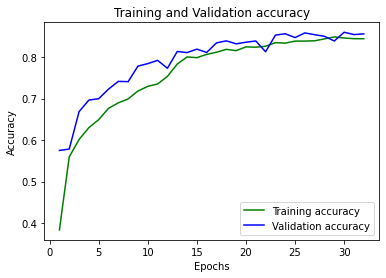

In [51]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,33)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")

Training Accuracy: 84.43%
Validation Accuracy: 85.59%


#### Loss

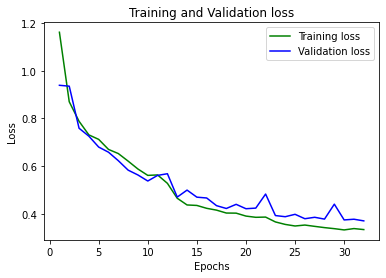

In [53]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,33)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Predictions of the Validation Set

In [54]:
predictions = np.argmax(classifier.predict(validation_set), axis=1)

C:\Users\Carolina Magee\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [55]:
accuracy_score(validation_set.y, predictions)

0.856675392670157

In [56]:
print(classification_report(validation_set.y, predictions, target_names=['normal', 'covid', 'lung_opacity', 'viral_pneumonia']))

                 precision    recall  f1-score   support

         normal       0.84      0.86      0.85      1080
          covid       0.89      0.79      0.84       651
   lung_opacity       0.86      0.87      0.86      1083
viral_pneumonia       0.85      0.95      0.89       242

       accuracy                           0.86      3056
      macro avg       0.86      0.87      0.86      3056
   weighted avg       0.86      0.86      0.86      3056



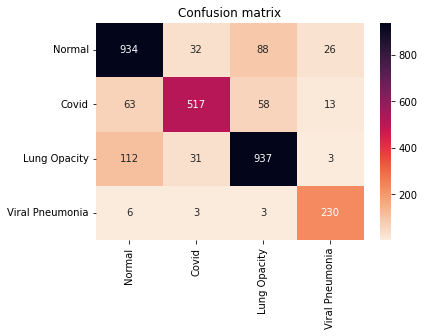

In [57]:
CM = confusion_matrix(validation_set.y, predictions)
target_names = ['Normal', 'Covid','Lung Opacity','Viral Pneumonia']
ax = plt.axes()
sn.heatmap(CM, cmap='rocket_r',
           annot=True, 
           fmt='d',
           xticklabels=target_names, 
           yticklabels=target_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

#### Predictions of the Test Set

In [58]:
test_predictions = np.argmax(classifier.predict(test_set), axis=1)

In [59]:
accuracy_score(test_set.y, test_predictions)

0.8657243816254417

In [60]:
print(classification_report(test_set.y, test_predictions, target_names=['normal', 'covid', 'lung_opacity', 'viral_pneumonia']))

                 precision    recall  f1-score   support

         normal       0.84      0.89      0.87       600
          covid       0.89      0.80      0.84       362
   lung_opacity       0.88      0.86      0.87       601
viral_pneumonia       0.86      0.95      0.90       135

       accuracy                           0.87      1698
      macro avg       0.87      0.88      0.87      1698
   weighted avg       0.87      0.87      0.87      1698



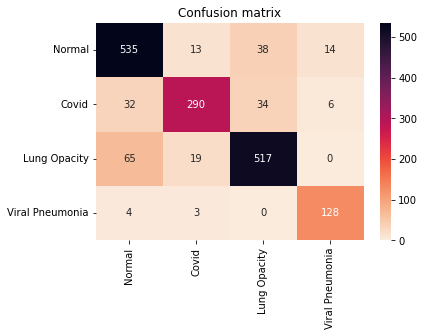

In [61]:
CM = confusion_matrix(test_set.y, test_predictions)
target_names = ['Normal', 'Covid','Lung Opacity','Viral Pneumonia']
ax = plt.axes()
sn.heatmap(CM, cmap='rocket_r',
           annot=True, 
           fmt='d',
           xticklabels=target_names, 
           yticklabels=target_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()